In [2]:
import pysam
import numpy as np

In [1]:
#pysam.index("/home/parastou/Desktop/parastou/UMI/pyUMI/sample_CCCTGG.bam")

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from pyUMI import umi_stats as stats
from pyUMI import multimap_solver as solver

In [4]:
import logging
logging.basicConfig(level=logging.INFO)

# TAGS Spec

'XC', 'TCTGCA' : Cellular Barcode

'XM', 'AGCCTAAAGT' : Molecular Barcode

'GE', 'ENSG00000225972' : Gene identifier with exon overlap

'XF', 'CODING' : Partial Alignment ?

'RG', 'A' : Read Group identifier (A read may belong to at most one read group.)

'NH', 2 : Number of reported alignments that contains the query in the current record

'NM', 0 : Number of mismatches (Edit distance to the reference), including mismatches in xxI in CIGAR line, and
          mismatches in xxM of CIGAR line (which is in MD string)
          
'UQ', 0 : Phred likelihood of the segment

'AS', 49 : Alignment score generated by aligner

'GS', '+' : ?

    INFO:__main__:Call to Cell DeMux module.
    INFO:__main__:Total number of samples: 12
    INFO:__main__:Elapsed time: 216 seconds
    INFO:__main__:De-multiplexing finish
    INFO:__main__:Elapsed time: 3027 seconds (50.45 minutes!!!)

In [14]:
st = pysam.AlignmentFile("/home/parastou/UMI/data/MUS/sample_ATCAAA.bam","rb")
reads = st.fetch(until_eof=True)

-----------------------------------------

INFO:pyUMI.umi_stats:  Total number of reads: 23164300
INFO:pyUMI.umi_stats:  Unmapped reads: 893013
INFO:pyUMI.umi_stats:  Mapped reads: 22271287


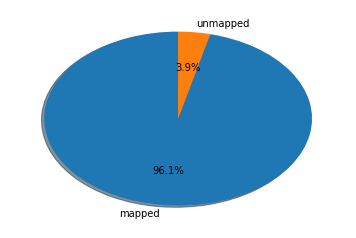

In [15]:
stats.mapping_stats(st, draw_pie=True)

INFO:pyUMI.umi_stats:  Present flags: [272, 16, 4, 256, 0]


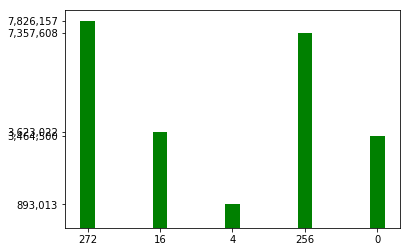

In [16]:
stats.flag_stats(st, report_info=True, draw_bar=True);

#### Check if BAM file is sorted

In [21]:
!samtools view -H /home/parastou/Desktop/parastou/UMI/data/MUS/sample_AAAACT.bam | head -1

@HD	VN:1.5	SO:coordinate


In [18]:
mm_hashtab = solver.build_multimapping_hashtable(st)

In [38]:
unq_hashtab, uns = solver.build_uniques_associations(st,cell_barcodes=["AAAACT"])

In [20]:
mm_hashtab

{'HISEQ:280:C9J9KANXX:2:1306:19764:61049': ('ATCAAA',
  'TTAAATACAA',
  [('ENSMUSG00000059796', 'chr11', 69667287),
   ('ENSMUSG00000082209', 'chr1', 60705296)]),
 'HISEQ:280:C9J9KANXX:1:1303:7491:31249': ('ATCAAA',
  'TTAATAGTTT',
  [(None, 'chr9', 78246411),
   (None, 'chr9', 78272857),
   ('ENSMUSG00000060461', 'chr9', 78367190)]),
 'HISEQ:280:C9J9KANXX:2:2215:20014:83758': ('ATCAAA',
  'GGGCCTTGTC',
  [('ENSMUSG00000050299', 'chr16', 76403341),
   ('ENSMUSG00000038274', 'chr19', 6059184)]),
 'HISEQ:280:C9J9KANXX:2:2312:11345:100514': ('ATCAAA',
  'TGCTGTTGGG',
  [('B2_Mm1t_dup17089', 'chr12', 84404310), (None, 'chr4', 132540610)]),
 'HISEQ:280:C9J9KANXX:1:1204:7497:8004': ('ATCAAA',
  'TCAAATTGTA',
  [('B2_Mm1a_dup10854', 'chr10', 76480734),
   ('B2_Mm1a_dup13946', 'chr13', 55758965),
   (None, 'chr3', 95213141),
   (None, 'chr6', 128331666),
   ('B2_Mm1a_dup8842', 'chr9', 32213205)]),
 'HISEQ:280:C9J9KANXX:1:1309:14089:61086': ('ATCAAA',
  'TTGGCGAGTT',
  [(None, 'chr1', 24614668)

In [40]:
uns

{}

    ERVB4_2-LTR_MM_dup63

    ERVB4_2-LTR_MM_dup63    chrY    +    29718275    29718800

    Read length = 50bp

    Read name = HISEQ:280:C9J9KANXX:2:2115:15792:76261

    ('ERVB4_2-LTR_MM_dup63', 'chrY', 29718465)

    Location = chrY:29,718,472

    Read name = HISEQ:280:C9J9KANXX:1:1310:7181:38503

    ('ERVB4_2-LTR_MM_dup63', 'chrY', 29718496)

    Location = chrY:29,718,546

    275 800

    472 522

    546 596



In [35]:
mm_hashtab["HISEQ:280:C9J9KANXX:2:2115:15792:76261"]

('ATCAAA',
 'GGGTTGCCGT',
 [('RLTR45_dup1358', 'chr15', 9219274),
  ('RLTR45_dup1359', 'chr15', 9226287),
  ('RLTR45_dup1361', 'chr15', 19370347),
  ('RLTR45_dup1440', 'chr17', 6893043),
  ('RLTR45_dup254', 'chr3', 129673239),
  ('RLTR45_dup257', 'chr3', 142708216),
  ('RLTR45_dup259', 'chr3', 150130579),
  ('RLTR45_dup385', 'chr6', 6319327),
  ('RLTR45_dup468', 'chr6', 149124873),
  ('RLTR45_dup519', 'chr7', 60258822),
  ('ERVB4_2-LTR_MM_dup63', 'chrY', 29718465),
  ('ERVB4_2-LTR_MM_dup65', 'chrY', 30780885),
  ('ERVB4_2-LTR_MM_dup67', 'chrY', 31677081),
  ('ERVB4_2-LTR_MM_dup69', 'chrY', 32654109),
  ('ERVB4_2-LTR_MM_dup75', 'chrY', 41671401),
  ('ERVB4_2-LTR_MM_dup80', 'chrY', 44290555),
  ('ERVB4_2-LTR_MM_dup82', 'chrY', 47417260),
  ('ERVB4_2-LTR_MM_dup84', 'chrY', 48278191),
  ('ERVB4_2-LTR_MM_dup86', 'chrY', 57990198),
  ('ERVB4_2-LTR_MM_dup88', 'chrY', 58857011),
  ('ERVB4_2-LTR_MM_dup90', 'chrY', 60207538),
  ('ERVB4_2-LTR_MM_dup92', 'chrY', 61068586),
  ('ERVB4_2-LTR_MM_dup94

In [36]:
mm_hashtab['HISEQ:280:C9J9KANXX:1:1310:7181:38503']

('ATCAAA',
 'ACTTAATGAT',
 [('RLTR45_dup1123', 'chr10', 77817838),
  ('RLTR45_dup1281', 'chr13', 64845946),
  ('RLTR45_dup1293', 'chr13', 70103583),
  ('RLTR45_dup1361', 'chr15', 19370378),
  ('RLTR45_dup1440', 'chr17', 6893074),
  ('ERVB4_2-LTR_MM_dup134', 'chr17', 39921089),
  ('RLTR45_dup63', 'chr1', 142127557),
  ('RLTR45_dup259', 'chr3', 150130548),
  ('RLTR45_dup502', 'chr7', 26989035),
  ('RLTR45_dup503', 'chr7', 26995878),
  ('RLTR45_dup597', 'chr8', 93485909),
  ('ERVB4_2-LTR_MM_dup59', 'chrY', 4829493),
  ('ERVB4_2-LTR_MM_dup60', 'chrY', 20662165),
  ('ERVB4_2-LTR_MM_dup62', 'chrY', 29324265),
  ('ERVB4_2-LTR_MM_dup63', 'chrY', 29718496),
  ('ERVB4_2-LTR_MM_dup64', 'chrY', 30471758),
  ('ERVB4_2-LTR_MM_dup65', 'chrY', 30780916),
  ('ERVB4_2-LTR_MM_dup66', 'chrY', 31345856),
  ('ERVB4_2-LTR_MM_dup67', 'chrY', 31677112),
  ('ERVB4_2-LTR_MM_dup68', 'chrY', 32352681),
  ('ERVB4_2-LTR_MM_dup69', 'chrY', 32654140),
  ('ERVB4_2-LTR_MM_dup70', 'chrY', 33219051),
  ('ERVB4_2-LTR_MM_du

In [26]:
st.reset()
reads = st.fetch(until_eof=True)

In [27]:
dups = []
for r in reads:
    if r.has_tag("GE"):
        if "ERVB4_2-LTR_MM" in r.get_tag("GE") :
            dups.append(r)

In [30]:
qnames = []
for d in dups:
    qnames.append(d.query_name)

In [34]:
for d in dups:
    if d.get_tag("GE") == "ERVB4_2-LTR_MM_dup63":
        print d.query_name

HISEQ:280:C9J9KANXX:2:2115:15792:76261
HISEQ:280:C9J9KANXX:1:1101:16478:19758
HISEQ:280:C9J9KANXX:1:1204:16336:87112
HISEQ:280:C9J9KANXX:1:2303:19965:21777
HISEQ:280:C9J9KANXX:1:1104:17340:85117
HISEQ:280:C9J9KANXX:1:1310:7181:38503
HISEQ:280:C9J9KANXX:1:1315:7153:96736
HISEQ:280:C9J9KANXX:1:2213:20378:90322
HISEQ:280:C9J9KANXX:2:1206:2912:88313
HISEQ:280:C9J9KANXX:2:1305:11773:21813
HISEQ:280:C9J9KANXX:2:1314:18496:12288
HISEQ:280:C9J9KANXX:2:2201:11422:2927


In [31]:
from collections import Counter
qn = Counter(qnames)
qn

Counter({'HISEQ:280:C9J9KANXX:1:1101:16478:19758': 13,
         'HISEQ:280:C9J9KANXX:1:1104:17340:85117': 33,
         'HISEQ:280:C9J9KANXX:1:1116:3960:20624': 2,
         'HISEQ:280:C9J9KANXX:1:1204:16336:87112': 13,
         'HISEQ:280:C9J9KANXX:1:1310:7181:38503': 34,
         'HISEQ:280:C9J9KANXX:1:1315:7153:96736': 34,
         'HISEQ:280:C9J9KANXX:1:2213:20378:90322': 35,
         'HISEQ:280:C9J9KANXX:1:2303:19965:21777': 13,
         'HISEQ:280:C9J9KANXX:2:1206:2912:88313': 33,
         'HISEQ:280:C9J9KANXX:2:1211:12583:49631': 3,
         'HISEQ:280:C9J9KANXX:2:1214:6840:8425': 1,
         'HISEQ:280:C9J9KANXX:2:1305:11773:21813': 33,
         'HISEQ:280:C9J9KANXX:2:1309:17809:5282': 2,
         'HISEQ:280:C9J9KANXX:2:1314:18496:12288': 34,
         'HISEQ:280:C9J9KANXX:2:2115:15792:76261': 13,
         'HISEQ:280:C9J9KANXX:2:2201:11422:2927': 34})

In [41]:
print;print "Total number of multimapped reads: %s" %format(len(mm_hashtab),",")
r = solver.multimap_multigene_generator(mm_hashtab,0)
savers = solver.rank1_multimap_solver(mm_generator=r, uniques_hashtable=unq_hashtab, uniques=uns, report_info=True)
dist = solver.unique_savers_dist(savers,mm_hashtab,unq_hashtab,draw_bar=True)

INFO:pyUMI.multimap_solver:  Generator for gene_annotated multimapped reads with at least 1 different gene varieties



Total number of multimapped reads: 2,992,811
key error!


TypeError: object of type 'NoneType' has no len()

INFO:pyUMI.multimap_solver:  Generator for gene_annotated multimapped reads with at least 2 different gene varieties


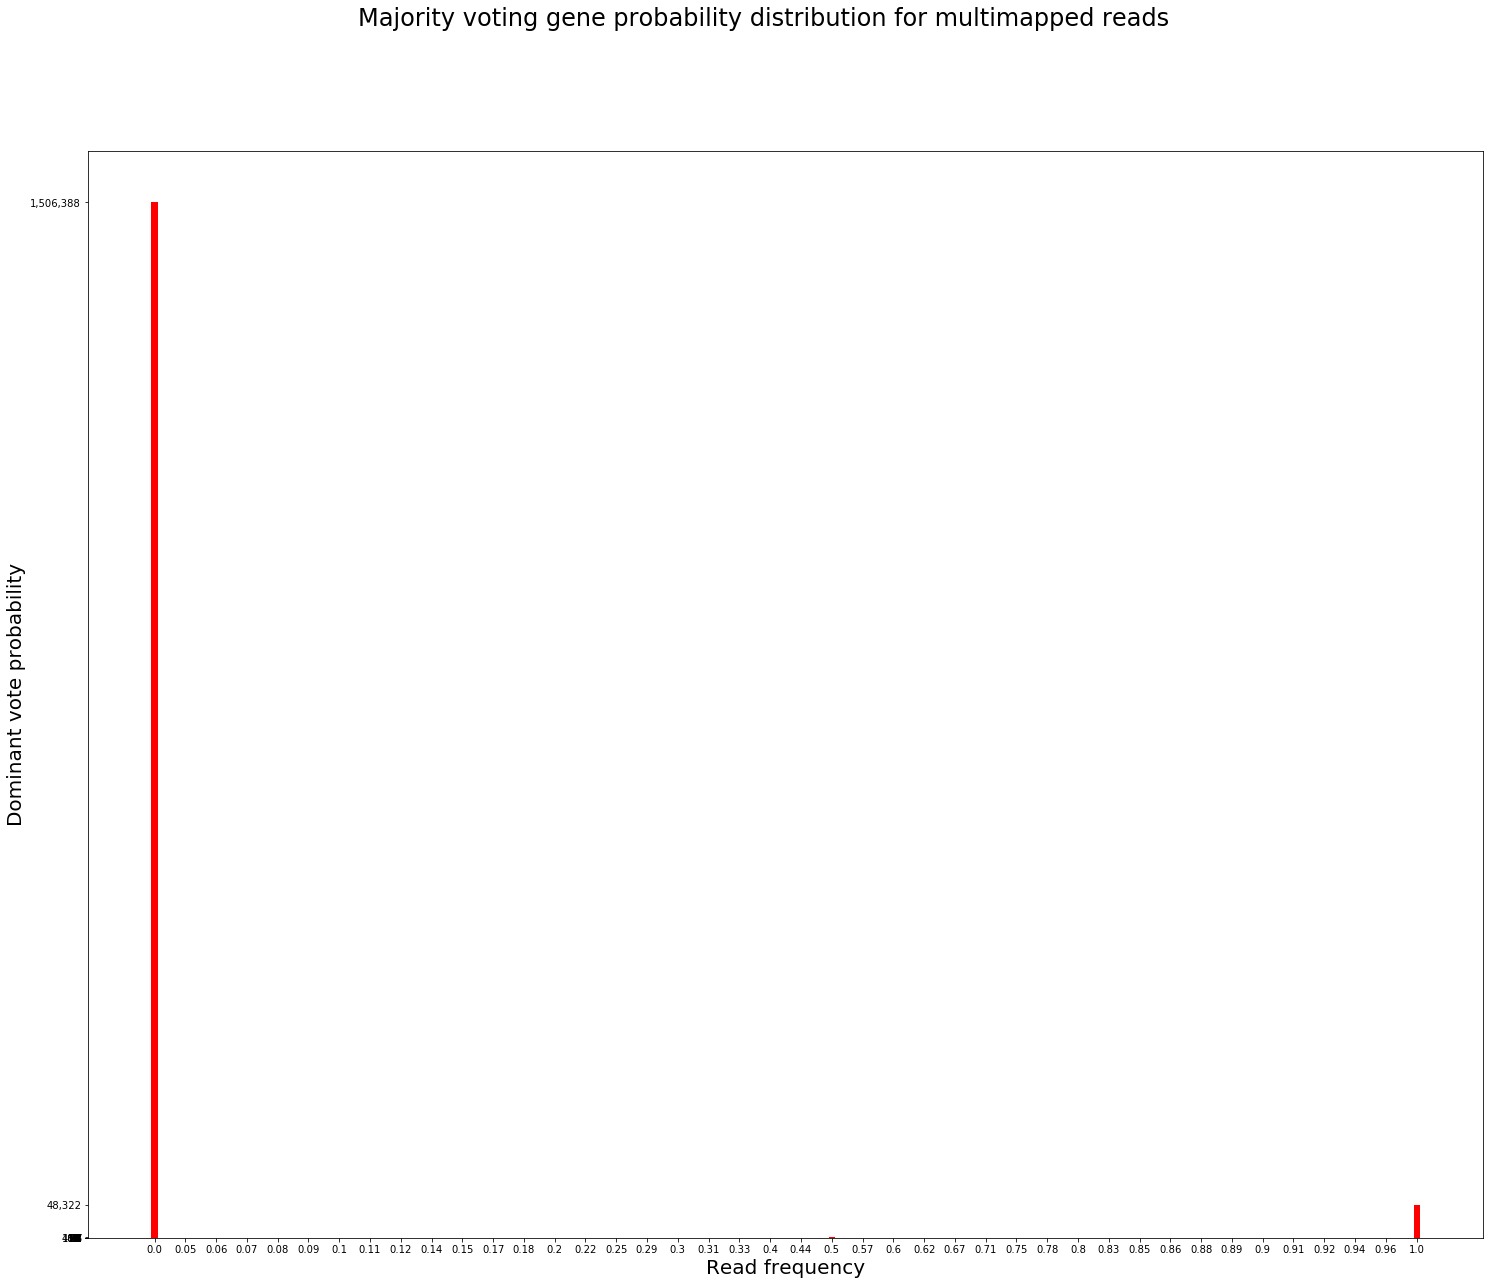

In [30]:
r1 = solver.multimap_multigene_generator(mm_hashtab,1);f1 = solver.majority_fraction_generator(mm_generator=r1, uniques_hashtable=unq_hashtab, uniques=uns)
c1 = solver.majority_fraction_report(mf_generator=f1,draw_bar=True,color='r',font_size=20)

INFO:pyUMI.multimap_solver:  Generator for gene_annotated multimapped reads with at least 2 different gene varieties



Total number of multimapped reads: 2,313,894


INFO:pyUMI.multimap_solver:  Total number of gene-annotated multimapped reads : 1,555,874
INFO:pyUMI.multimap_solver:  Number of multimapped reads resolved to a unique gene : 48,322


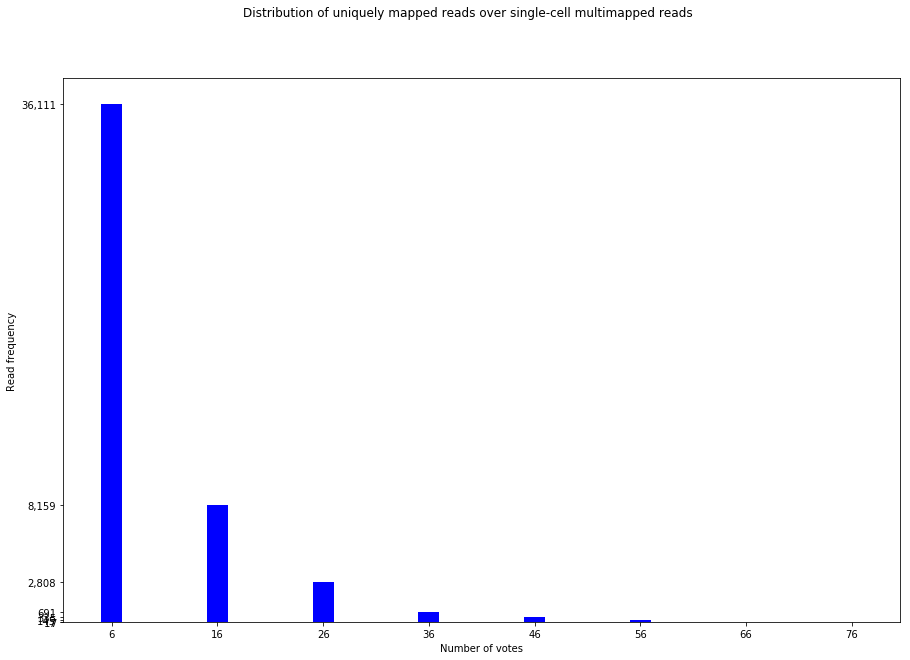

In [25]:
print;print "Total number of multimapped reads: %s" %format(len(mm_hashtab),",")
r = solver.multimap_multigene_generator(mm_hashtab,1)
savers = solver.rank1_multimap_solver(mm_generator=r, uniques_hashtable=unq_hashtab, uniques=uns, report_info=True)
dist = solver.unique_savers_dist(savers,mm_hashtab,unq_hashtab,draw_bar=True)

In [9]:
st.reset()
reads =  st.fetch(until_eof=True)

for r in reads:
    if r.get_tag("XM") == 'GTTATGCTTT':
        print r
        print
        print 'sequence: %s' %r.get_reference_sequence()
        print 'flag: %d' %r.flag
        print '(properties) bin: %d'%r.bin
        print 'cigar string: %s'%r.cigarstring 
        print 'cellular barcode: %s' %r.get_tag("XC")
        
        print "*" * 20
        
"""
cigartuples
compare(self, AlignedSegment other)
get_aligned_pairs(self, matches_only=False, with_seq=False) 
get_blocks(self)
get_cigar_stats(self)
CHECK! get_overlap(self, uint32_t start, uint32_t end) 
get_reference_positions(self, full_length=False) 
get_tag(self, tag, with_value_type=False) 
get_tags(self, with_value_type=False)  
has_tag(self, tag) 
infer_query_length(self, always=True) 
is_duplicate 
is_paired 
is_proper_pair 
is_qcfail 
is_read1 
is_read2 
is_reverse 
is_secondary 
is_supplementary 
is_unmapped 
mapping_quality 
mate_is_reverse 
mate_is_unmapped 
next_reference_id 
next_reference_name 
next_reference_start 
query_alignment_end 
query_alignment_length 
query_alignment_qualities 
query_alignment_sequence 
query_alignment_start 
query_length 
query_name 
query_qualities 
query_sequence 
reference_end 
reference_id 
reference_length 
reference_name 
reference_start 
set_tag(self, tag, value, value_type=None, replace=True) 
set_tags(self, tags) 
template_length
tostring(self, AlignmentFile_t htsfile) 
"""
        

HISEQ:280:C9J9KANXX:1:1114:13946:45034	0	0	7675121	255	36M1082N14M	-1	-1	50	TGCCTGTGTCATTACTGAAGGCTCATGAGGCTGACATGTGGGAGGTTCAC	array('B', [32, 31, 31, 31, 29, 37, 16, 31, 16, 37, 38, 29, 34, 16, 37, 37, 38, 29, 37, 36, 38, 29, 29, 38, 34, 38, 38, 34, 36, 38, 38, 36, 33, 15, 16, 16, 30, 36, 28, 37, 36, 29, 15, 28, 36, 37, 37, 15, 15, 28])	[('XC', 'ATATAG'), ('GE', 'ENSMUSG00000040034'), ('XF', 'CODING'), ('PG', 'STAR'), ('RG', 'A'), ('NH', 1), ('NM', 1), ('XM', 'GTTATGCTTT'), ('UQ', 16), ('AS', 47), ('GS', '+')]

sequence: TGCCTGTGTCATTACTGAAGGCTCATGAGGCTGACATGTGGGAGGTTCAC
flag: 0
(properties) bin: 5149
cigar string: 36M1082N14M
cellular barcode: ATATAG
********************
HISEQ:280:C9J9KANXX:1:1313:6862:45922	0	0	7675121	255	36M1082N14M	-1	-1	50	TGCCTGTGTCATTACTGAAGGCTCATGAGGCTGAAATGTGGGGGGTTCAC	array('B', [27, 18, 27, 21, 25, 36, 33, 35, 37, 36, 34, 15, 28, 26, 35, 37, 38, 38, 35, 38, 38, 37, 29, 38, 15, 28, 16, 16, 16, 36, 37, 35, 35, 15, 16, 16, 28, 37, 16, 16, 36, 33, 2, 2, 2, 2, 

KeyboardInterrupt: 